<a href="https://colab.research.google.com/github/GalaAldebara/PCVK_IqbalMakmur/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## 3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png)

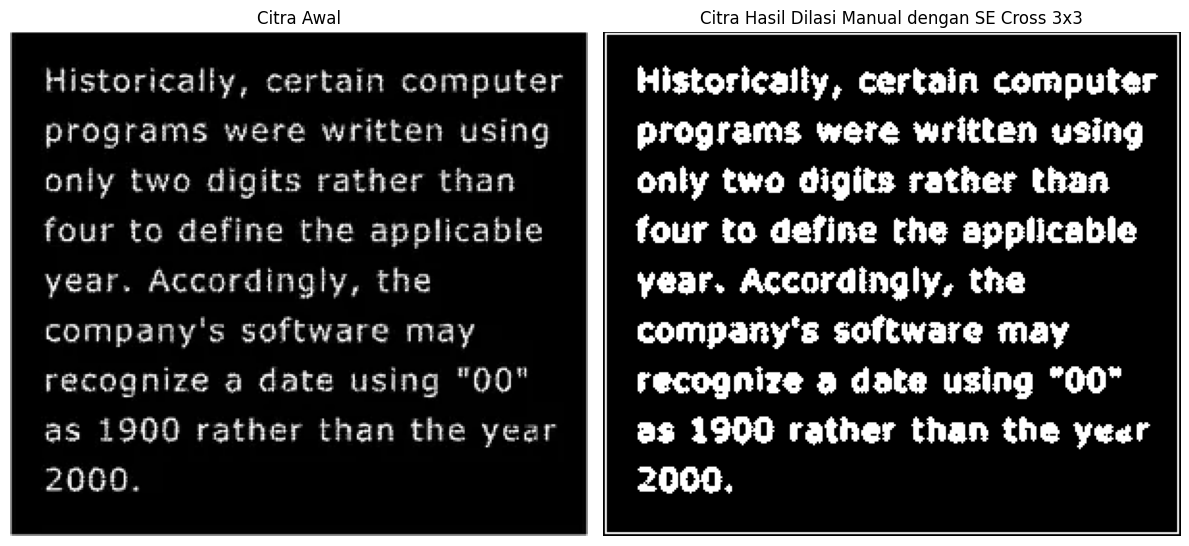

In [13]:
def display_images_side_by_side(images, titles):
    plt.figure(figsize=(12, 6))
    n = len(images)
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def dilate_manual(image, se):
    image_bin = np.where(image > 127, 1, 0).astype(np.uint8)
    dilated_image = np.zeros_like(image_bin)

    se_height, se_width = se.shape
    offset_y, offset_x = se_height // 2, se_width // 2

    for y in range(offset_y, image_bin.shape[0] - offset_y):
        for x in range(offset_x, image_bin.shape[1] - offset_x):
            if np.any(image_bin[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1] & se):
                dilated_image[y, x] = 1

    dilated_image = (dilated_image * 255).astype(np.uint8)
    return dilated_image

se_cross = np.array([[0, 1, 0],
                     [1, 1, 1],
                     [0, 1, 0]], dtype=np.uint8)

image_path = '/content/drive/MyDrive/Images/morphology.png'
image = cv2.imread(image_path, 0)

if image is None:
    print("Gambar tidak ditemukan, periksa kembali jalurnya.")
else:
    dilated_image_manual = dilate_manual(image, se_cross)

    display_images_side_by_side(
        [image, dilated_image_manual],
        ["Citra Awal", "Citra Hasil Dilasi Manual dengan SE Cross 3x3"]
    )

## 4.  Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya)

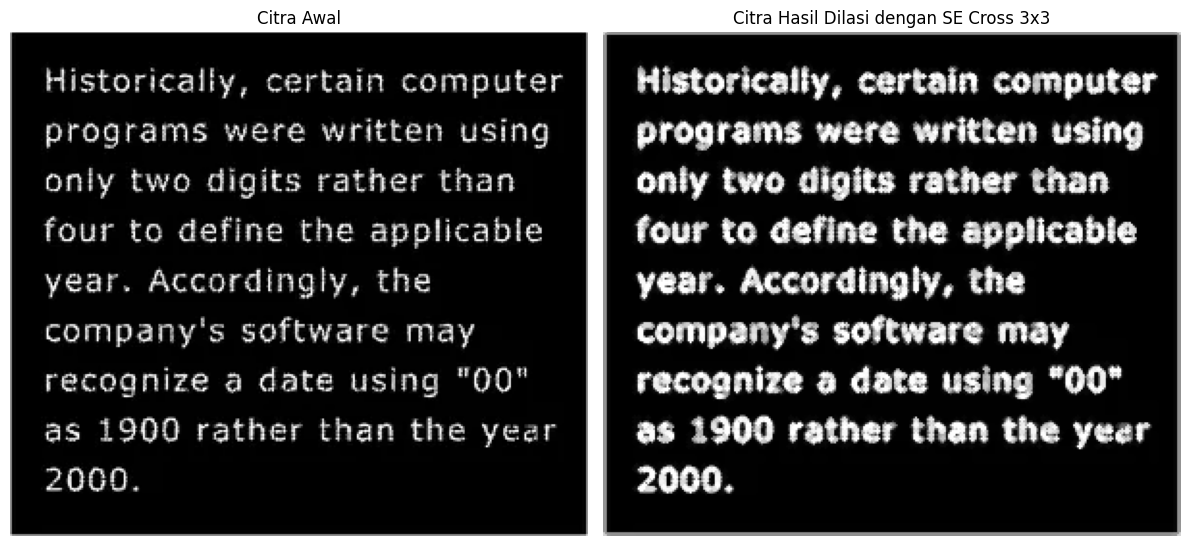

In [18]:
def display_images_side_by_side(images, titles):
    plt.figure(figsize=(12, 6))
    n = len(images)
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

image_path = '/content/drive/MyDrive/Images/morphology.png'
image = cv2.imread(image_path, 0)

if image is None:
    print("Gambar tidak ditemukan, periksa kembali jalurnya.")
else:
    se_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    dilated_image_cv = cv2.dilate(image, se_cross)

    display_images_side_by_side(
        [image, dilated_image_cv],
        ["Citra Awal", "Citra Hasil Dilasi dengan SE Cross 3x3"]
    )

## 5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

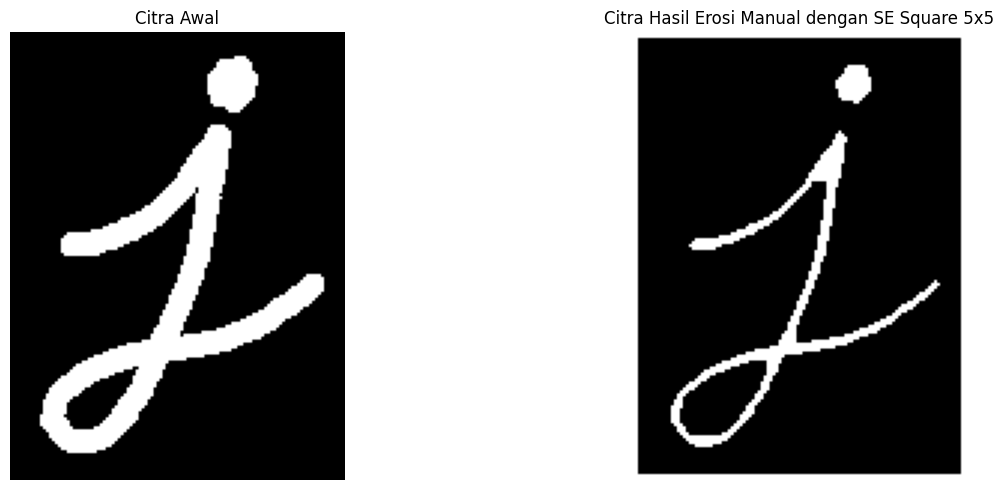

In [30]:
def erode_manual(image, se):
    image_bin = np.where(image > 127, 1, 0).astype(np.uint8)
    eroded_image = np.ones_like(image_bin)

    se_height, se_width = se.shape
    offset_y, offset_x = se_height // 2, se_width // 2

    for y in range(offset_y, image_bin.shape[0] - offset_y):
        for x in range(offset_x, image_bin.shape[1] - offset_x):
            if np.all(image_bin[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1] & se):
                eroded_image[y, x] = 1
            else:
                eroded_image[y, x] = 0

    eroded_image = (eroded_image * 255).astype(np.uint8)
    return eroded_image

se_square = np.ones((5, 5), dtype=np.uint8)

image_path = '/content/drive/MyDrive/Images/j.png'
image = cv2.imread(image_path, 0)

if image is None:
    print("Gambar tidak ditemukan, periksa kembali jalurnya.")
else:
    eroded_image_manual = erode_manual(image, se_square)

    display_images_side_by_side(
        [image, eroded_image_manual],
        ["Citra Awal", "Citra Hasil Erosi Manual dengan SE Square 5x5"]
    )

## 6.Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

Structuring Element (Square 5x5):
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


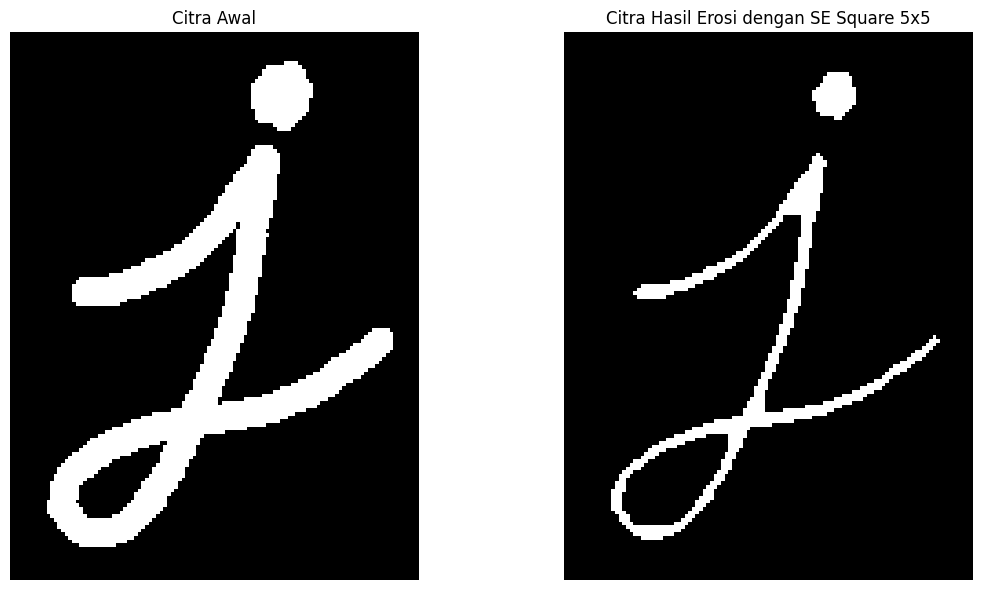

In [22]:
def display_images_side_by_side(images, titles):
    plt.figure(figsize=(12, 6))
    n = len(images)
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

image_path = '/content/drive/MyDrive/Images/j.png'
image = cv2.imread(image_path, 0)

if image is None:
    print("Gambar tidak ditemukan, periksa kembali jalurnya.")
else:
    se_square = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

    print("Structuring Element (Square 5x5):")
    print(se_square)

    eroded_image_cv = cv2.erode(image, se_square)

    display_images_side_by_side(
        [image, eroded_image_cv],
        ["Citra Awal", "Citra Hasil Erosi dengan SE Square 5x5"]
    )

## 7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

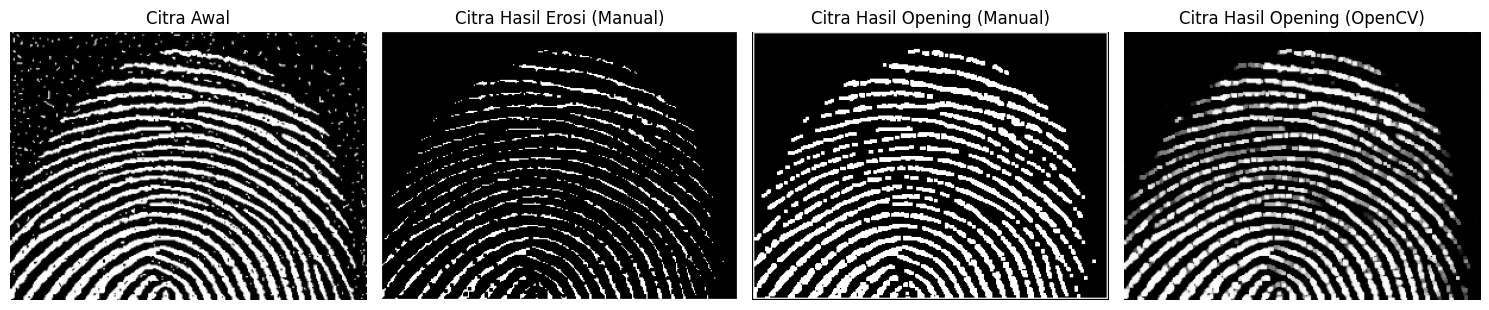

In [26]:
def display_images_side_by_side(images, titles):
    plt.figure(figsize=(15, 5))
    n = len(images)
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def erode_manual(image, se):
    image_bin = np.where(image > 127, 1, 0).astype(np.uint8)
    eroded_image = np.ones_like(image_bin)

    se_height, se_width = se.shape
    offset_y, offset_x = se_height // 2, se_width // 2

    for y in range(offset_y, image_bin.shape[0] - offset_y):
        for x in range(offset_x, image_bin.shape[1] - offset_x):
            if np.all(image_bin[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1] & se):
                eroded_image[y, x] = 1
            else:
                eroded_image[y, x] = 0

    eroded_image = (eroded_image * 255).astype(np.uint8)
    return eroded_image

def dilate_manual(image, se):
    image_bin = np.where(image > 127, 1, 0).astype(np.uint8)
    dilated_image = np.zeros_like(image_bin)

    se_height, se_width = se.shape
    offset_y, offset_x = se_height // 2, se_width // 2

    for y in range(offset_y, image_bin.shape[0] - offset_y):
        for x in range(offset_x, image_bin.shape[1] - offset_x):
            if np.any(image_bin[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1] & se):
                dilated_image[y, x] = 1

    dilated_image = (dilated_image * 255).astype(np.uint8)
    return dilated_image

se_square = np.ones((3, 3), dtype=np.uint8)

image_path = '/content/drive/MyDrive/Images/fingerprint.png'
image = cv2.imread(image_path, 0)

if image is None:
    print("Gambar tidak ditemukan, periksa kembali jalurnya.")
else:
    eroded_image_manual = erode_manual(image, se_square)
    opened_image_manual = dilate_manual(eroded_image_manual, se_square)

    opened_image_cv = cv2.morphologyEx(image, cv2.MORPH_OPEN, se_square)

    display_images_side_by_side(
        [image, eroded_image_manual, opened_image_manual, opened_image_cv],
        ["Citra Awal", "Citra Hasil Erosi (Manual)", "Citra Hasil Opening (Manual)", "Citra Hasil Opening (OpenCV)"]
    )

## 8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)


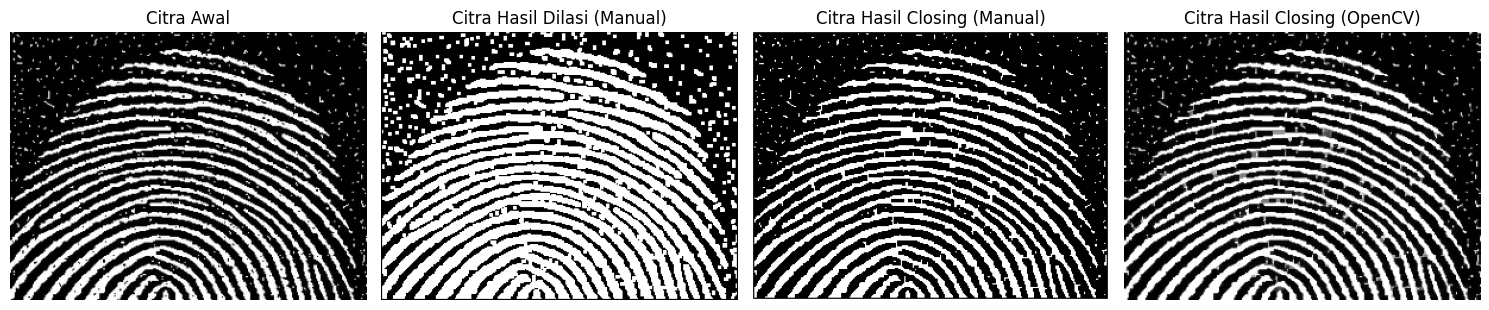

In [29]:
def display_images_side_by_side(images, titles):
    plt.figure(figsize=(15, 5))
    n = len(images)
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def dilate_manual(image, se):
    image_bin = np.where(image > 127, 1, 0).astype(np.uint8)
    dilated_image = np.zeros_like(image_bin)

    se_height, se_width = se.shape
    offset_y, offset_x = se_height // 2, se_width // 2

    for y in range(offset_y, image_bin.shape[0] - offset_y):
        for x in range(offset_x, image_bin.shape[1] - offset_x):
            if np.any(image_bin[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1] & se):
                dilated_image[y, x] = 1

    dilated_image = (dilated_image * 255).astype(np.uint8)
    return dilated_image

def erode_manual(image, se):
    image_bin = np.where(image > 127, 1, 0).astype(np.uint8)
    eroded_image = np.ones_like(image_bin)

    se_height, se_width = se.shape
    offset_y, offset_x = se_height // 2, se_width // 2

    for y in range(offset_y, image_bin.shape[0] - offset_y):
        for x in range(offset_x, image_bin.shape[1] - offset_x):
            if np.all(image_bin[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1] & se):
                eroded_image[y, x] = 1
            else:
                eroded_image[y, x] = 0

    eroded_image = (eroded_image * 255).astype(np.uint8)
    return eroded_image

se_square = np.ones((3, 3), dtype=np.uint8)

image_path = '/content/drive/MyDrive/Images/fingerprint.png'
image = cv2.imread(image_path, 0)

if image is None:
    print("Gambar tidak ditemukan, periksa kembali jalurnya.")
else:
    dilated_image_manual = dilate_manual(image, se_square)
    closed_image_manual = erode_manual(dilated_image_manual, se_square)

    closed_image_cv = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se_square)

    display_images_side_by_side(
        [image, dilated_image_manual, closed_image_manual, closed_image_cv],
        ["Citra Awal", "Citra Hasil Dilasi (Manual)", "Citra Hasil Closing (Manual)", "Citra Hasil Closing (OpenCV)"]
    )

## 9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

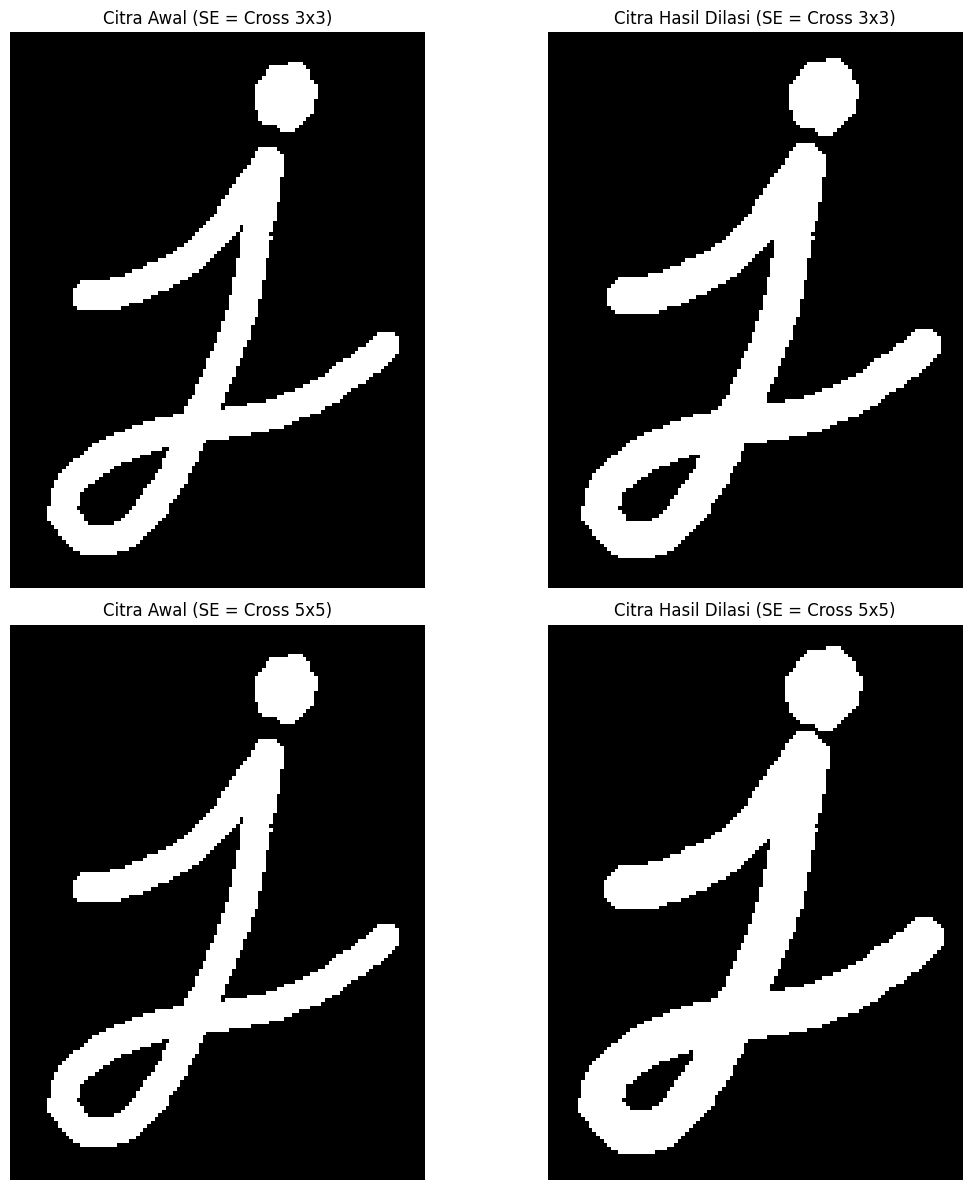

In [31]:
def display_images_side_by_side(images, titles, rows, cols):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

image_path = '/content/drive/MyDrive/Images/j.png'
image = cv2.imread(image_path, 0)

if image is None:
    print("Gambar tidak ditemukan, periksa kembali jalurnya.")
else:
    se_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    dilated_image_cross_3x3 = cv2.dilate(image, se_cross_3x3)

    se_cross_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
    dilated_image_cross_5x5 = cv2.dilate(image, se_cross_5x5)

    display_images_side_by_side(
        [image, dilated_image_cross_3x3, image, dilated_image_cross_5x5],
        ["Citra Awal (SE = Cross 3x3)", "Citra Hasil Dilasi (SE = Cross 3x3)",
         "Citra Awal (SE = Cross 5x5)", "Citra Hasil Dilasi (SE = Cross 5x5)"],
        rows=2, cols=2
    )

## 10.  Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)


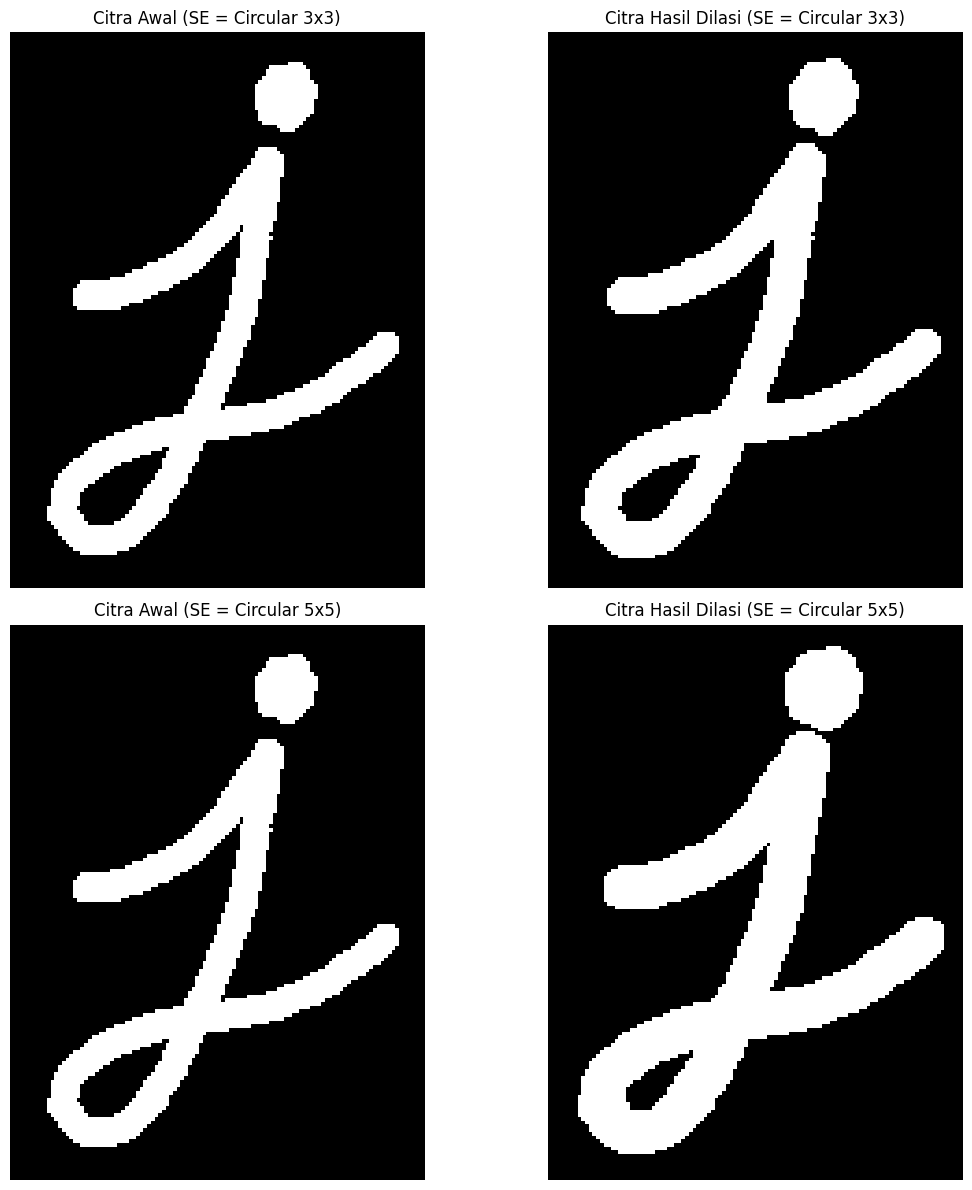

In [33]:
def display_images_side_by_side(images, titles, rows, cols):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

image_path = '/content/drive/MyDrive/Images/j.png'
image = cv2.imread(image_path, 0)

if image is None:
    print("Gambar tidak ditemukan, periksa kembali jalurnya.")
else:
    se_circle_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    dilated_image_circle_3x3 = cv2.dilate(image, se_circle_3x3)

    se_circle_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    dilated_image_circle_5x5 = cv2.dilate(image, se_circle_5x5)

    display_images_side_by_side(
        [image, dilated_image_circle_3x3, image, dilated_image_circle_5x5],
        ["Citra Awal (SE = Circular 3x3)", "Citra Hasil Dilasi (SE = Circular 3x3)",
         "Citra Awal (SE = Circular 5x5)", "Citra Hasil Dilasi (SE = Circular 5x5)"],
        rows=2, cols=2
    )

## 11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5  dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

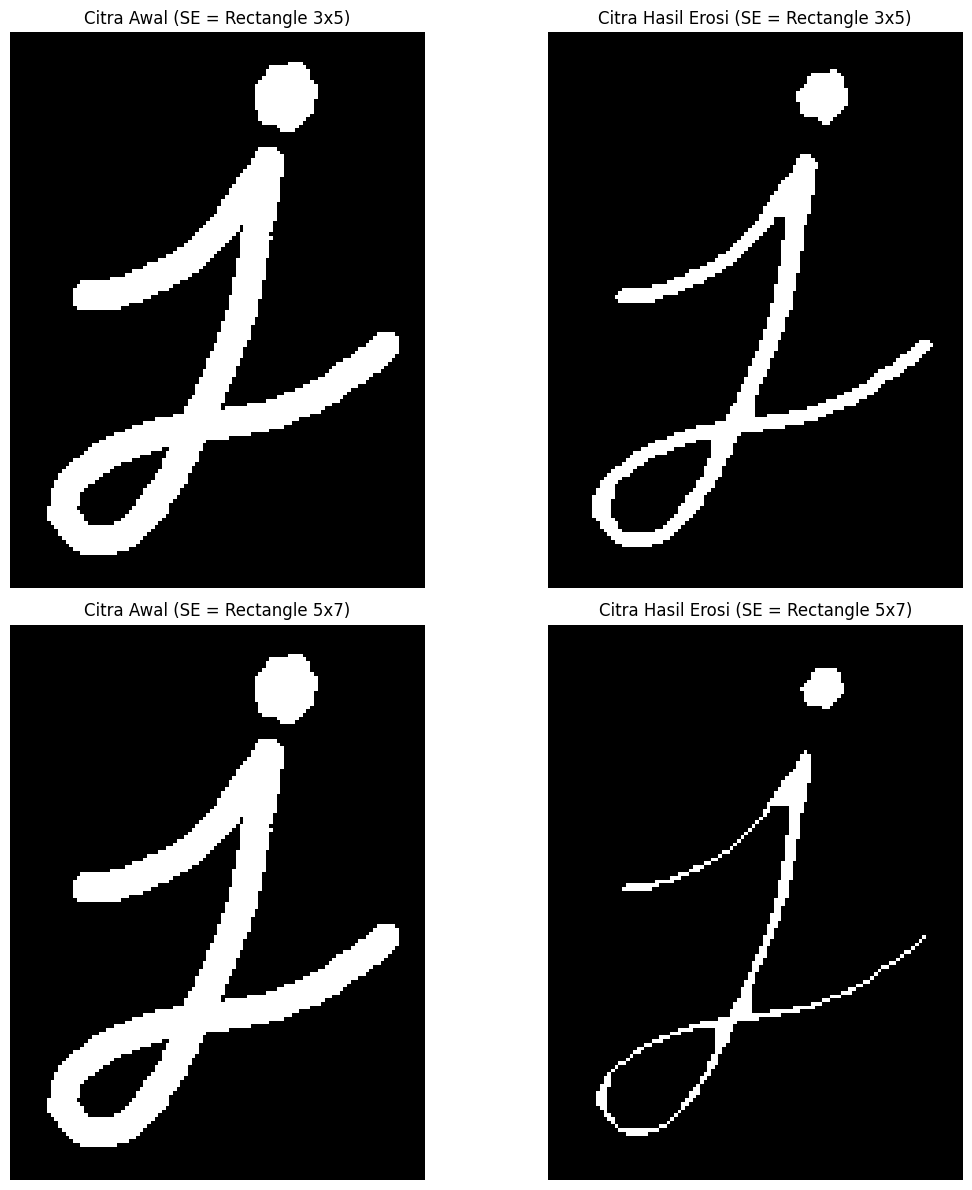

In [34]:
def display_images_side_by_side(images, titles, rows, cols):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

image_path = '/content/drive/MyDrive/Images/j.png'
image = cv2.imread(image_path, 0)

if image is None:
    print("Gambar tidak ditemukan, periksa kembali jalurnya.")
else:
    se_rect_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
    eroded_image_rect_3x5 = cv2.erode(image, se_rect_3x5)

    se_rect_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))
    eroded_image_rect_5x7 = cv2.erode(image, se_rect_5x7)

    display_images_side_by_side(
        [image, eroded_image_rect_3x5, image, eroded_image_rect_5x7],
        ["Citra Awal (SE = Rectangle 3x5)", "Citra Hasil Erosi (SE = Rectangle 3x5)",
         "Citra Awal (SE = Rectangle 5x7)", "Citra Hasil Erosi (SE = Rectangle 5x7)"],
        rows=2, cols=2
    )

## 12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


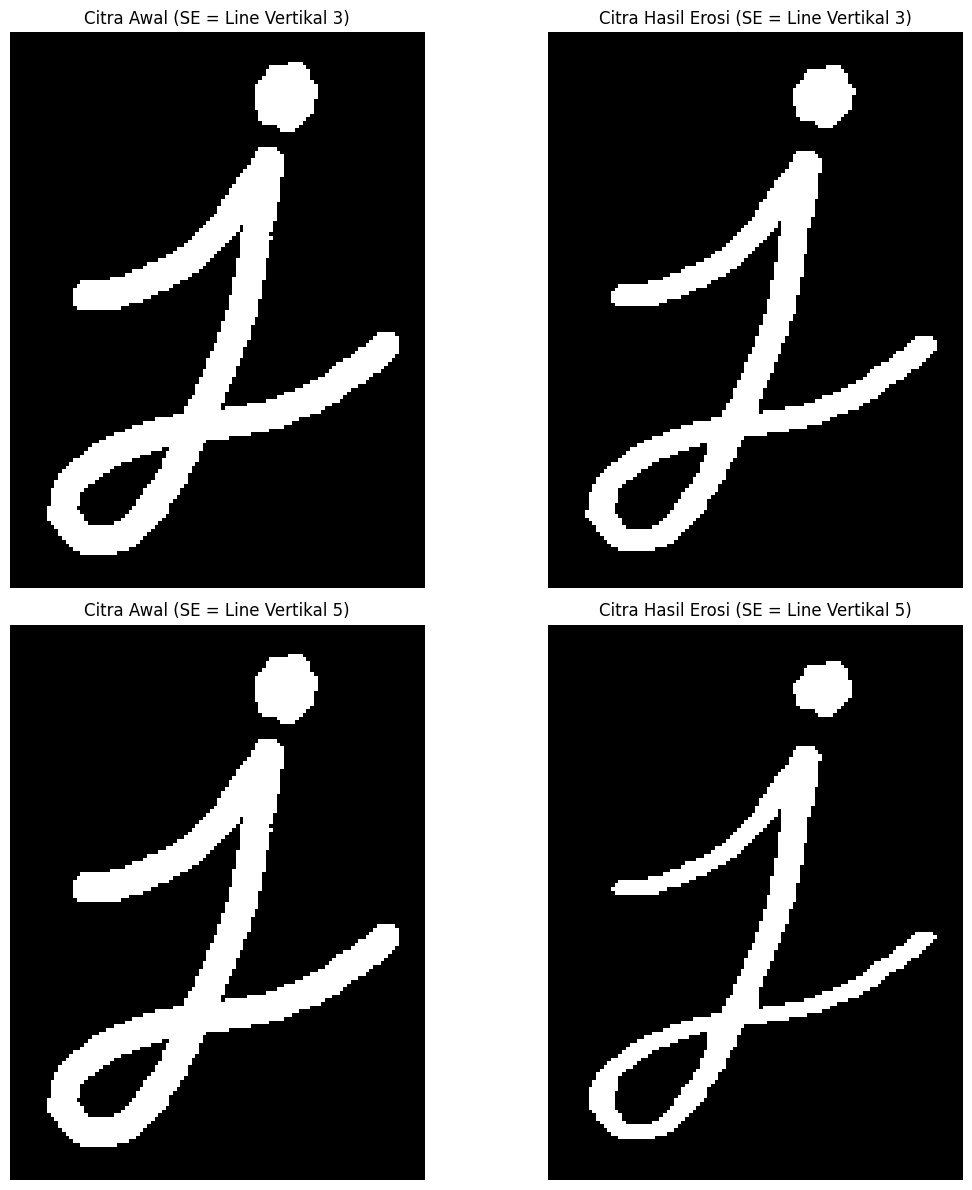

In [36]:
def display_images_side_by_side(images, titles, rows, cols):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

image_path = '/content/drive/MyDrive/Images/j.png'
image = cv2.imread(image_path, 0)

if image is None:
    print("Gambar tidak ditemukan, periksa kembali jalurnya.")
else:
    se_line_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
    eroded_image_line_3 = cv2.erode(image, se_line_3)

    se_line_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))
    eroded_image_line_5 = cv2.erode(image, se_line_5)

    display_images_side_by_side(
        [image, eroded_image_line_3, image, eroded_image_line_5],
        ["Citra Awal (SE = Line Vertikal 3)", "Citra Hasil Erosi (SE = Line Vertikal 3)",
         "Citra Awal (SE = Line Vertikal 5)", "Citra Hasil Erosi (SE = Line Vertikal 5)"],
        rows=2, cols=2
    )


#Tugas Kelompok

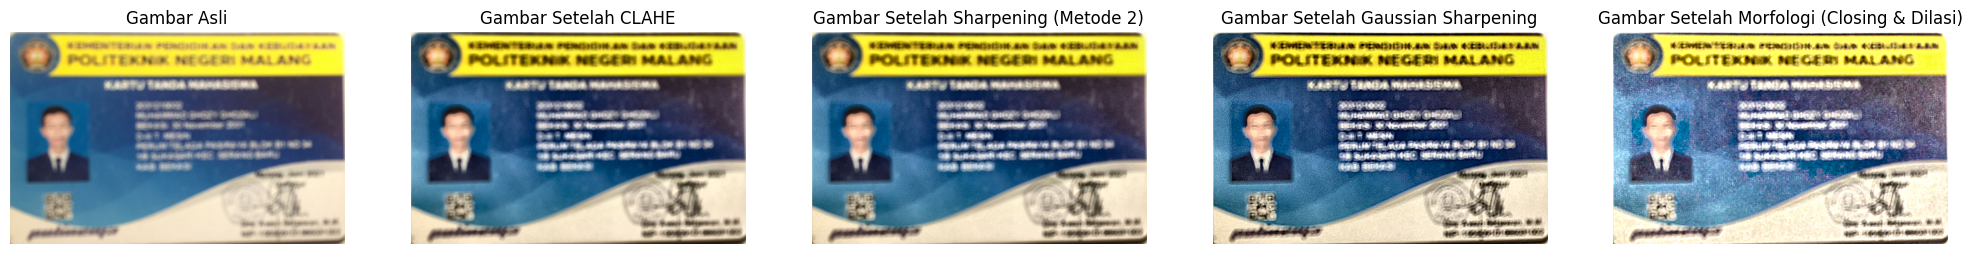

In [35]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def clahe_gambar(gambar, batasKlip=0.8, ukuranTile=(4, 4)):
    lab = cv.cvtColor(gambar, cv.COLOR_RGB2LAB)
    l, a, b = cv.split(lab)

    clahe = cv.createCLAHE(clipLimit=batasKlip, tileGridSize=ukuranTile)
    cl = clahe.apply(l)

    limg = cv.merge((cl, a, b))
    gambar_enhanced = cv.cvtColor(limg, cv.COLOR_LAB2RGB)
    return gambar_enhanced

def sharpen_gambar(gambar, metode=1):
    if metode == 1:
        kernel = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
    else:
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
    gambar_sharpen = cv.filter2D(src=gambar, ddepth=-1, kernel=kernel)
    return gambar_sharpen

def gaussian_sharpen(gambar, ukuran_kernel=21, sigma=5, alpha=1.0):
    kernel = kernel_gaussian(ukuran_kernel, sigma)
    blur = np.zeros_like(gambar)
    for c in range(3):
        blur[:, :, c] = cv.filter2D(gambar[:, :, c], -1, kernel)

    gambar_sharpen = cv.addWeighted(gambar, 1 + alpha, blur, -alpha, 0)
    gambar_sharpen = np.clip(gambar_sharpen, 0, 255).astype(np.uint8)
    return gambar_sharpen

def kernel_gaussian(ukuran, sigma):
    ax = np.linspace(-(ukuran // 2), ukuran // 2, ukuran)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

def morfologi_gambar(gambar, operasi='dilasi', se_size=(5, 5)):
    se = cv.getStructuringElement(cv.MORPH_RECT, se_size)
    if operasi == 'dilasi':
        gambar_morfologi = cv.dilate(gambar, se)
    elif operasi == 'erosi':
        gambar_morfologi = cv.erode(gambar, se)
    elif operasi == 'closing':
        gambar_morfologi = cv.morphologyEx(gambar, cv.MORPH_CLOSE, se)
    else:
        gambar_morfologi = gambar
    return gambar_morfologi

lokasi_gambar = '/content/drive/MyDrive/Images/KTM.jpg'
gambar = cv.imread(lokasi_gambar)
gambar_rgb = cv.cvtColor(gambar, cv.COLOR_BGR2RGB)

gambar_clahe = clahe_gambar(gambar_rgb, batasKlip=2.0, ukuranTile=(8, 8))

gambar_sharpen = sharpen_gambar(gambar_clahe, metode=2)

gambar_final_sharpen = gaussian_sharpen(gambar_sharpen, ukuran_kernel=21, sigma=5, alpha=1.5)

gambar_morfologi_closing = morfologi_gambar(gambar_final_sharpen, operasi='closing', se_size=(5, 5))

gambar_morfologi_dilasi = morfologi_gambar(gambar_morfologi_closing, operasi='dilasi', se_size=(3, 3))

fig, ax = plt.subplots(1, 5, figsize=(25, 5))

ax[0].imshow(gambar_rgb)
ax[0].set_title('Gambar Asli')
ax[0].axis('off')

ax[1].imshow(gambar_clahe)
ax[1].set_title('Gambar Setelah CLAHE')
ax[1].axis('off')

ax[2].imshow(gambar_sharpen)
ax[2].set_title('Gambar Setelah Sharpening (Metode 2)')
ax[2].axis('off')

ax[3].imshow(gambar_final_sharpen)
ax[3].set_title('Gambar Setelah Gaussian Sharpening')
ax[3].axis('off')

ax[4].imshow(gambar_morfologi_dilasi)
ax[4].set_title('Gambar Setelah Morfologi (Closing & Dilasi)')
ax[4].axis('off')

plt.show()
